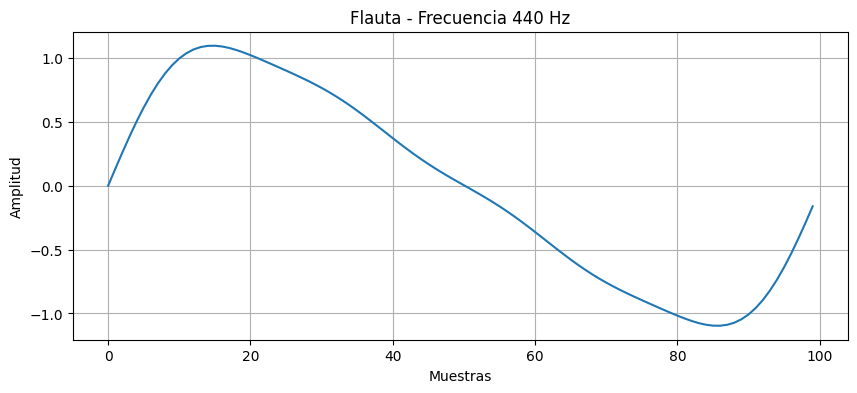

In [31]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

SRATE = 44100


def harm0sc(f,amps,dur,amp=1): # intento de flauta o violin si le cambias la freq
    t = np.arange(0, dur, 1/SRATE)
    signal = amp*np.sin(2 * np.pi * f * t) + amps[0]*np.sin(2 * np.pi * f * 2 * t) + amps[1]*np.sin(2 * np.pi * f * 3 * t) + amps[2]*np.sin(2 * np.pi * f * 4 * t) 
    return signal
    
    
amps = [0.3, 0.1, 0.05]
signal = harm0sc(440, amps,4, 1 )


# Reproducir la onda generada
sd.play(signal, SRATE)
sd.wait()

# Graficar la señal resultante
plt.figure(figsize=(10, 4))
plt.plot(signal[:100])
plt.title("Flauta - Frecuencia 440 Hz")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

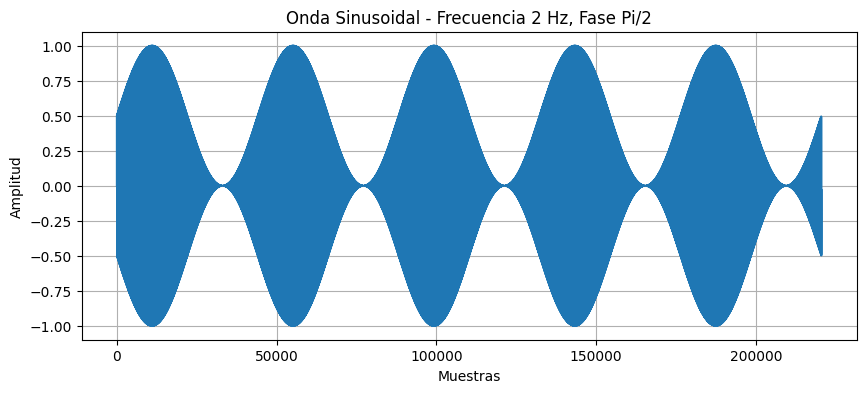

In [18]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

SRATE = 44100


def osc(freq, dur=1, amp=1, phase=0):
    dur = dur/2
    t = np.arange(0, dur, 1/SRATE)
    wave = amp * np.sin(2 * np.pi * freq * t + phase)
    return wave

def modulator(signal, freq):
    t = np.arange(0, 1, 1/SRATE)
    modsignal = np.sin(2 * np.pi * freq * t)
    modsignal = modsignal + 1
    modsignal = modsignal / 2
    modsignal = np.resize(modsignal, signal.shape)
    return signal*modsignal

wave = osc(440,10,1,0)
signal = modulator(wave,1)

# Reproducir la onda generada
sd.play(signal, SRATE)
sd.wait()

# Graficar la señal resultante
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title("Onda Sinusoidal - Frecuencia 2 Hz, Fase Pi/2")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

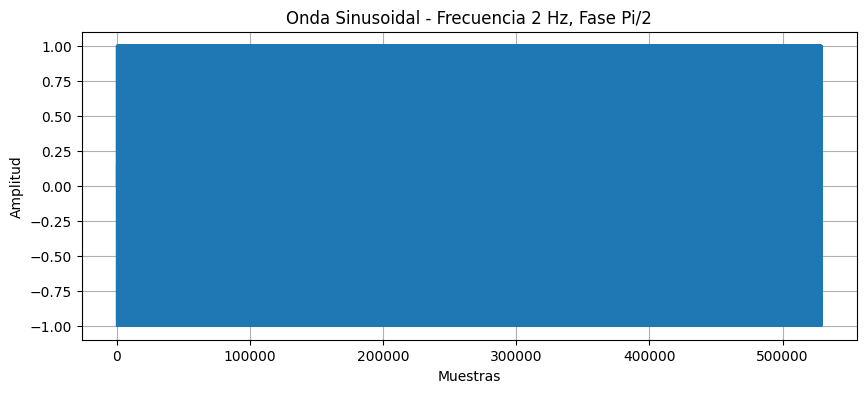

In [2]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

SRATE = 44100

frequencies = {
    'C': 523.251, 'D': 587.33, 'E': 659.255, 'F': 698.456, 'G': 783.991,
    'A': 880, 'B': 987.767, 'c': 1046.502, 'd': 1174.659, 'e': 1318.51,
    'f': 1396.913, 'g': 1567.982, 'a': 1760, 'b': 1975.533, 'c1': 2093.004
}
partitura = [
    ('G', 0.5), ('G', 0.5), ('A', 1), ('G', 1), ('c', 1), ('B', 2),
    ('G', 0.5), ('G', 0.5), ('A', 1), ('G', 1), ('d', 1), ('c', 2),
    ('G', 0.5), ('G', 0.5), ('g', 1), ('e', 1), ('c', 1), ('B', 1),('A', 1),
    ('f', 0.5), ('f', 0.5), ('e', 1), ('c', 1), ('d', 1), ('c', 2),
    # Agrega aquí las notas que desees
]

def osc(freq, dur=1, amp=1, phase=0):

    dur = dur/2
    t = np.arange(0, dur, 1/SRATE)
    wave = amp * np.sin(2 * np.pi * freq * t + phase)
    return wave

signal = np.array([]) 
for nota, duracion in partitura:
    wave = osc(frequencies[nota], duracion, 1, 0)  # Generar la onda para la nota
    signal = np.concatenate((signal, wave))


# Reproducir la onda generada
sd.play(signal, SRATE)
sd.wait()

# Graficar la señal resultante
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title("Onda Sinusoidal - Frecuencia 2 Hz, Fase Pi/2")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


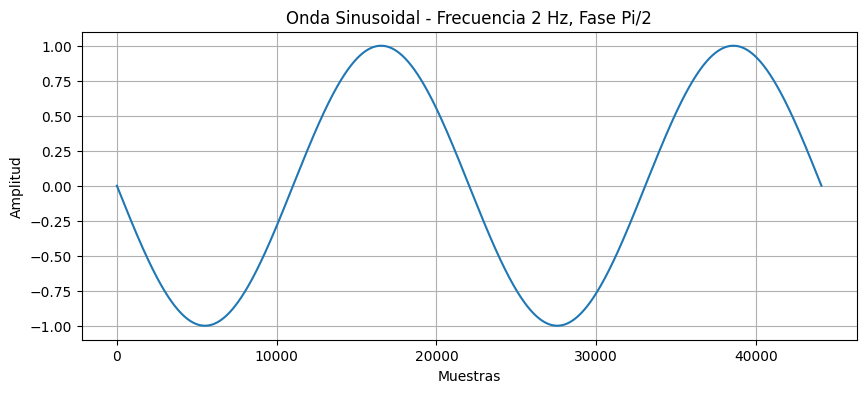

In [81]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

SRATE = 44100  


def osc(freq, dur=1, amp=1, phase=0):

    t = np.arange(0, dur, 1/SRATE)
    wave = amp * np.sin(2 * np.pi * freq * t + phase)
    return wave


signal = osc(2, 1, 1, np.pi)

# Reproducir la onda generada
sd.play(signal, SRATE)
sd.wait()

# Graficar la señal resultante
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title("Onda Sinusoidal - Frecuencia 2 Hz, Fase Pi/2")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


[ 0.          0.03726733  0.07448288 ... -0.71942788 -0.69304346
 -0.66569616]
[ 0.          0.04694705  0.09379058 ... -0.73930883 -0.70688107
 -0.67289448]
[ 0.          0.0558215   0.11146893 ... -0.16676875 -0.11146893
 -0.0558215 ]


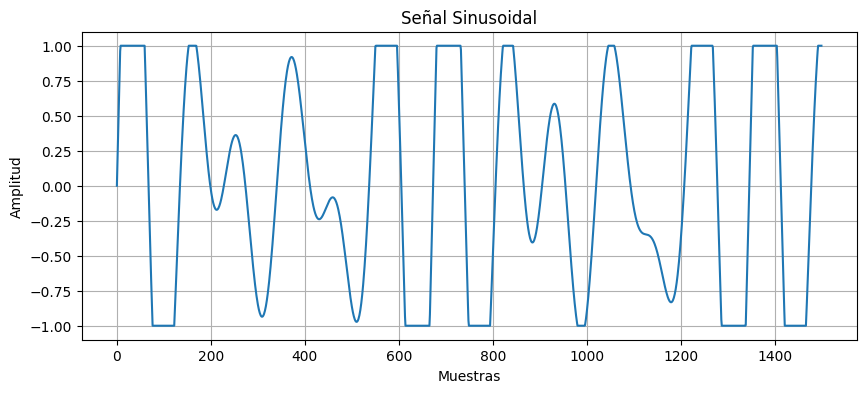

In [69]:
# Nombre1 y apellidos1
# Nombre2 y apellidos2
#%% 
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import random
import time # para medir tiempos de ejecución
# gráficos en el notebook
%matplotlib inline
SRATE = 44100 # Sample rate, para todo el programa



def sinusoidalFunc(frecuencia, dur):
    t = np.arange(0, dur, 1/SRATE)

    # Generar la onda sinusoidal de 1 Hz
    sinusoidal = np.sin(2 * np.pi * frecuencia * t)

    print(sinusoidal)
    return sinusoidal


sinusoidal1 = sinusoidalFunc(261.63, 3)
sinusoidal2 = sinusoidalFunc(329.63,3)
sinusoidal3 = sinusoidalFunc(392.00,3)
sinusoidal4 = sinusoidal1 + sinusoidal2 + sinusoidal3
sinusoidal5 = np.clip(sinusoidal4, -1, 1)
sd.play(sinusoidal5)
sd.wait()
plt.figure(figsize=(10, 4))  
plt.plot(sinusoidal5[:1500]) 
plt.title("Señal Sinusoidal")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


In [ ]:
mi_env/bin/python -m ipykernel install --user --name=mi_env --display-name "Python (mi_env)"


In [ ]:
!python -m pip install matplotlib



In [ ]:
# Nombre1 y apellidos1
# Nombre2 y apellidos2
#%% 
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import random
import time # para medir tiempos de ejecución
# gráficos en el notebook
%matplotlib inline
SRATE = 441000 # Sample rate, para todo el programa

def noise1(dur):
    noise = np.empty(dur*SRATE)
    for i in range(dur*SRATE):
        noise[i] = 2 * random.random() - 1
    print(noise)
    return noise

def noise2(dur):
    num_samples = int(SRATE * dur)
    noise = 2 * np.random.random(num_samples) - 1  
    print(noise)
    return noise

noise1(3)
noise = noise2(1)

sd.play(noise)
sd.wait()
plt.figure(figsize=(10, 4))
plt.plot(noise[:1000])  # Mostrar solo las primeras 1000 muestras para una visualización detallada
plt.title("Señal de Ruido Blanco")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()
